In [1]:
# this path append is for binder only
import sys
sys.path.append("../../")

#spectrome modules
# from spectrome.forward import runforward, runforward_spatialcorrelation_topalpha
from spectrome.utils import functions, path
from spectrome.brain import Brain
from spectrome.stability import localstability_microintensity_allrois
# from spectrome.stability import localstability
# from spectrome.forward import network_transfer_macrostable_microintensity_extrastimulus as nt
# from spectrome.forward import network_transfer_macrostable_microintensity as nt_nostimulus
from spectrome.forward import network_transfer_macrostable as nt
from spectrome.forward import runforward_spatialcorrelation_mahalanobis 
from spectrome.forward import runforward_spatialcorrelation_old
from spectrome.forward import runforward_spatialcorrelation_topalpha

#generic modules
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import seaborn as sns
import pickle as pkl
from scipy import stats
from scipy.stats import pearsonr
from scipy.io import loadmat
from sklearn.preprocessing import minmax_scale

pd.DataFrame.iteritems = pd.DataFrame.items

plt.rcParams.update({
    "mathtext.fontset": "stix",
    "font.family": "STIXGeneral",
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
})

In [2]:
# cortical areas with MEG collected + source reconstructed
rois_with_MEG = np.arange(0,68)

ind_psd_xr = xr.open_dataarray('../data/individual_psd_reordered_matlab.nc')
ind_psd = ind_psd_xr.values

ind_conn_xr = xr.open_dataarray('../data/individual_connectomes_reordered.nc')
ind_conn = ind_conn_xr.values

ind_regions = ind_conn_xr["regionx"].values

fvec = ind_psd_xr["frequencies"].values

nsubs_chang = len(ind_psd[0,0,:])

sleep = loadmat('/data/rajlab1/user_data/parul/sleep_files/PSD_pmtm_50Hz_DK_relative_reordered.mat')
print("Loaded sleep data", flush= True)

Data = sleep['PSD_reordered']

N2 = Data[:,1]
wake = Data[:,3]

temp = np.squeeze(N2[0][0])

fvec_sleep = temp['freqs'][0][:,0]

# Take frequencies till 35 Hz
fvec_sleep = fvec_sleep[0:45]

temp = np.squeeze(N2[0][0])
psd_N2 = temp['psdx']

print("shape of N2:", psd_N2.shape)

nsubs_sleep = len(psd_N2)

temp = np.squeeze(wake[0][0])
psd_wake = temp['psdx']

Loaded sleep data
shape of N2: (18,)


In [3]:
orgsgm_hcp_mahalanobis = np.loadtxt("/data/rajlab1/user_data/parul/spectromeP_results/results_globalSGM/alpha_experiments/noreducedC_Cnormalized_mahalanobis2/orgSGM_chang_hcptemplate.csv",delimiter=",")
orgsgm_mica_mahalanobis = np.loadtxt("/data/rajlab1/user_data/parul/spectromeP_results/results_globalSGM/alpha_experiments/noreducedC_Cnormalized_mahalanobis2/orgSGM_chang_micatemplate.csv",delimiter=",")
orgsgm_ind_mahalanobis = np.loadtxt("/data/rajlab1/user_data/parul/spectromeP_results/results_globalSGM/alpha_experiments/noreducedC_Cnormalized_mahalanobis2/orgSGM_chang_ind.csv",delimiter=",")

orgsgm_wake_mahalanobis =  np.loadtxt("/data/rajlab1/user_data/parul/spectromeP_results/results_globalSGM/alpha_experiments/noreducedC_Cnormalized_mahalanobis2/sleep_wake_DK_oldcost_45Hz.csv", delimiter=",")
orgsgm_N2_mahalanobis = np.loadtxt("/data/rajlab1/user_data/parul/spectromeP_results/results_globalSGM/alpha_experiments/noreducedC_Cnormalized_mahalanobis2/sleep_N2_DK_oldcost_45Hz.csv", delimiter=",")


orgsgm_hcp_oldcost = np.loadtxt("/data/rajlab1/user_data/parul/spectromeP_results/results_globalSGM/alpha_experiments/noreducedC_Cnormalized_orgspatcost/orgSGM_chang_hcptemplate.csv",delimiter=",")
orgsgm_mica_oldcost = np.loadtxt("/data/rajlab1/user_data/parul/spectromeP_results/results_globalSGM/alpha_experiments/noreducedC_Cnormalized_orgspatcost/orgSGM_chang_micatemplate.csv",delimiter=",")
orgsgm_ind_oldcost = np.loadtxt("/data/rajlab1/user_data/parul/spectromeP_results/results_globalSGM/alpha_experiments/noreducedC_Cnormalized_orgspatcost/orgSGM_chang_ind.csv",delimiter=",")

orgsgm_wake_oldcost =  np.loadtxt("/data/rajlab1/user_data/parul/spectromeP_results/results_globalSGM/alpha_experiments/noreducedC_Cnormalized_orgspatcost/sleep_wake_DK_oldcost_45Hz.csv", delimiter=",")
orgsgm_N2_oldcost = np.loadtxt("/data/rajlab1/user_data/parul/spectromeP_results/results_globalSGM/alpha_experiments/noreducedC_Cnormalized_orgspatcost/sleep_N2_DK_oldcost_45Hz.csv", delimiter=",")


In [4]:
orgsgm_hcp_mahalanobis_sorted = orgsgm_hcp_mahalanobis[np.argsort(orgsgm_hcp_mahalanobis[:,10])]
orgsgm_ind_mahalanobis_sorted = orgsgm_ind_mahalanobis[np.argsort(orgsgm_ind_mahalanobis[:,10])]
orgsgm_mica_mahalanobis_sorted = orgsgm_mica_mahalanobis[np.argsort(orgsgm_mica_mahalanobis[:,10])]

orgsgm_wake_mahalanobis_sorted = orgsgm_wake_mahalanobis[np.argsort(orgsgm_wake_mahalanobis[:,10])]
orgsgm_N2_mahalanobis_sorted = orgsgm_N2_mahalanobis[np.argsort(orgsgm_N2_mahalanobis[:,10])]


orgsgm_hcp_oldcost_sorted = orgsgm_hcp_oldcost[np.argsort(orgsgm_hcp_oldcost[:,10])]
orgsgm_ind_oldcost_sorted = orgsgm_ind_oldcost[np.argsort(orgsgm_ind_oldcost[:,10])]
orgsgm_mica_oldcost_sorted = orgsgm_mica_oldcost[np.argsort(orgsgm_mica_oldcost[:,10])]


orgsgm_wake_oldcost_sorted = orgsgm_wake_oldcost[np.argsort(orgsgm_wake_oldcost[:,10])]
orgsgm_N2_oldcost_sorted = orgsgm_N2_oldcost[np.argsort(orgsgm_N2_oldcost[:,10])]

In [5]:
w_chosen = orgsgm_hcp_mahalanobis_sorted
df_orgsgm_hcp_mahalanobis=pd.DataFrame({'tau_e':w_chosen[:,0], 'tau_i':w_chosen[:,1], 'alpha':w_chosen[:,2], 'speed':w_chosen[:,3], 'gei':w_chosen[:,4], 'gii':w_chosen[:,5], 'tauC':w_chosen[:,6], 'spectral':w_chosen[:,8], 'spatial':w_chosen[:,9], 'conn':'hcp', 'model':'orgSGM'})

w_chosen = orgsgm_ind_mahalanobis_sorted
df_orgsgm_ind_mahalanobis=pd.DataFrame({'tau_e':w_chosen[:,0], 'tau_i':w_chosen[:,1], 'alpha':w_chosen[:,2], 'speed':w_chosen[:,3], 'gei':w_chosen[:,4], 'gii':w_chosen[:,5], 'tauC':w_chosen[:,6], 'spectral':w_chosen[:,8], 'spatial':w_chosen[:,9], 'conn':'ind', 'model':'orgSGM'})

w_chosen = orgsgm_mica_mahalanobis_sorted
df_orgsgm_mica_mahalanobis=pd.DataFrame({'tau_e':w_chosen[:,0], 'tau_i':w_chosen[:,1], 'alpha':w_chosen[:,2], 'speed':w_chosen[:,3], 'gei':w_chosen[:,4], 'gii':w_chosen[:,5], 'tauC':w_chosen[:,6], 'spectral':w_chosen[:,8], 'spatial':w_chosen[:,9], 'conn':'mica', 'model':'orgSGM'})


w_chosen = orgsgm_wake_mahalanobis_sorted
df_orgsgm_wake_mahalanobis=pd.DataFrame({'tau_e':w_chosen[:,0], 'tau_i':w_chosen[:,1], 'alpha':w_chosen[:,2], 'speed':w_chosen[:,3], 'gei':w_chosen[:,4], 'gii':w_chosen[:,5], 'tauC':w_chosen[:,6], 'spectral':w_chosen[:,8], 'spatial':w_chosen[:,9], 'conn':'wake', 'model':'orgSGM'})

w_chosen = orgsgm_N2_mahalanobis_sorted
df_orgsgm_N2_mahalanobis=pd.DataFrame({'tau_e':w_chosen[:,0], 'tau_i':w_chosen[:,1], 'alpha':w_chosen[:,2], 'speed':w_chosen[:,3], 'gei':w_chosen[:,4], 'gii':w_chosen[:,5], 'tauC':w_chosen[:,6], 'spectral':w_chosen[:,8], 'spatial':w_chosen[:,9], 'conn':'N2', 'model':'orgSGM'})


w_chosen = orgsgm_hcp_oldcost_sorted
df_orgsgm_hcp_oldcost=pd.DataFrame({'tau_e':w_chosen[:,0], 'tau_i':w_chosen[:,1], 'alpha':w_chosen[:,2], 'speed':w_chosen[:,3], 'gei':w_chosen[:,4], 'gii':w_chosen[:,5], 'tauC':w_chosen[:,6], 'spectral':w_chosen[:,8], 'spatial':w_chosen[:,9], 'conn':'hcp', 'model':'orgSGM'})

w_chosen = orgsgm_ind_oldcost_sorted
df_orgsgm_ind_oldcost=pd.DataFrame({'tau_e':w_chosen[:,0], 'tau_i':w_chosen[:,1], 'alpha':w_chosen[:,2], 'speed':w_chosen[:,3], 'gei':w_chosen[:,4], 'gii':w_chosen[:,5], 'tauC':w_chosen[:,6], 'spectral':w_chosen[:,8], 'spatial':w_chosen[:,9], 'conn':'ind', 'model':'orgSGM'})

w_chosen = orgsgm_mica_oldcost_sorted
df_orgsgm_mica_oldcost=pd.DataFrame({'tau_e':w_chosen[:,0], 'tau_i':w_chosen[:,1], 'alpha':w_chosen[:,2], 'speed':w_chosen[:,3], 'gei':w_chosen[:,4], 'gii':w_chosen[:,5], 'tauC':w_chosen[:,6], 'spectral':w_chosen[:,8], 'spatial':w_chosen[:,9], 'conn':'mica', 'model':'orgSGM'})


w_chosen = orgsgm_wake_oldcost_sorted
df_orgsgm_wake_oldcost=pd.DataFrame({'tau_e':w_chosen[:,0], 'tau_i':w_chosen[:,1], 'alpha':w_chosen[:,2], 'speed':w_chosen[:,3], 'gei':w_chosen[:,4], 'gii':w_chosen[:,5], 'tauC':w_chosen[:,6], 'spectral':w_chosen[:,8], 'spatial':w_chosen[:,9], 'conn':'wake', 'model':'orgSGM'})

w_chosen = orgsgm_N2_oldcost_sorted
df_orgsgm_N2_oldcost=pd.DataFrame({'tau_e':w_chosen[:,0], 'tau_i':w_chosen[:,1], 'alpha':w_chosen[:,2], 'speed':w_chosen[:,3], 'gei':w_chosen[:,4], 'gii':w_chosen[:,5], 'tauC':w_chosen[:,6], 'spectral':w_chosen[:,8], 'spatial':w_chosen[:,9], 'conn':'N2', 'model':'orgSGM'})


In [6]:
def getpsd(cdk,psd,rois_with_MEG,fvec,s,df_in, stimulus_roi, w_var, w_means, conn, data):

    C_ind = cdk[:,:,s] # grab current subject's individual connectome
    
    if data == 'chang':
        F_ind = psd[:,:,s] # grab current subject's MEG
    if data == 'sleep':
        F_ind = psd[s][:,0:45]
        
    F_ind_db = 10*np.log10(F_ind)

    data_dir = path.get_data_path()
    # # create spectrome brain:
    brain = Brain.Brain()
    brain.add_connectome(data_dir) # grabs distance matrix
    # # re-ordering for DK atlas and normalizing the connectomes:
    brain.reorder_connectome(brain.connectome, brain.distance_matrix)
    
    if conn == 'hcp':
        brain.connectome = brain.connectome
    if conn == 'ind':
        brain.connectome = C_ind
    if conn == 'mica':
        sc_dk_mica = loadmat("/data/rajlab1/shared_data/datasets/MICA/mica_sc_dt_aparc_nocorpuscollusum.mat")
        brain.connectome = sc_dk_mica['SC_mean']
        brain.distance_matrix = sc_dk_mica['DT_mean']

    brain.reducedConnectome = brain.connectome

    brain.ntf_params["tau_e"] = df_in['tau_e'][s]/1000
    brain.ntf_params["tau_i"] = df_in['tau_i'][s]/1000
    brain.ntf_params["alpha"] = df_in['alpha'][s]
    brain.ntf_params["speed"] = df_in['speed'][s]
    brain.ntf_params["gei"] = df_in['gei'][s]
    brain.ntf_params["gii"] = df_in['gii'][s]
    brain.ntf_params["tauC"] = df_in['tauC'][s]/1000
    
    
    freqband = np.where((fvec>=8) & (fvec<=12))[0]

    eigvec_ns = np.zeros((len(rois_with_MEG),len(freqband)))
    eigvec_ns_db = np.zeros((len(rois_with_MEG),len(freqband)))

    for i in range(len(freqband)):
        w = 2 * np.pi * fvec[freqband[i]]
        eigenvectors_ns, _, _, _ = nt.network_transfer_local_alpha(
            brain, brain.ntf_params, w, stimulus_roi, w_var, w_means
        )

        eigvec_ns[:,i] = eigenvectors_ns[rois_with_MEG]
        eigvec_ns_db[:,i] = 20*np.log10(eigenvectors_ns)[rois_with_MEG]

    eigvec_ns_summed = np.sum(eigvec_ns,axis = 1)
    eigvec_ns_summed_db = np.sum(eigvec_ns_db,axis = 1)
    
    eigvec_ns_summed = eigvec_ns_summed/np.linalg.norm(eigvec_ns_summed)
    eigvec_ns_summed_db = eigvec_ns_summed_db/np.linalg.norm(eigvec_ns_summed_db)

    summed_PSD = np.sum(F_ind[:,freqband], axis = 1)
    summed_PSD_db = np.sum(F_ind_db[:,freqband], axis = 1)
    
    summed_PSD = summed_PSD/np.linalg.norm(summed_PSD)
    summed_PSD_db = summed_PSD_db/np.linalg.norm(summed_PSD_db)
    
    # spat_corr_old = runforward_spatialcorrelation_old.run_local_coupling_forward_Xk(brain, brain.ntf_params, fvec, F_ind, 86, rois_with_MEG, "alpha")
    # spat_corr_old_db = runforward_spatialcorrelation_old.run_local_coupling_forward_Xk_db(brain, brain.ntf_params, fvec, F_ind, 86, rois_with_MEG, "alpha")

    spat_corr_old = runforward_spatialcorrelation_old.run_local_coupling_forward_Xk(brain, brain.ntf_params, fvec, F_ind, 86, rois_with_MEG, "alpha")
    spat_corr_old_db = runforward_spatialcorrelation_old.run_local_coupling_forward_Xk_db(brain, brain.ntf_params, fvec, F_ind, 86, rois_with_MEG, "alpha")
    
    spat_corr_mahalanobis = runforward_spatialcorrelation_mahalanobis.run_local_coupling_forward_Xk(brain, brain.ntf_params, fvec, F_ind, 86, rois_with_MEG, "alpha")
    spat_corr_mahalanobis_db = runforward_spatialcorrelation_mahalanobis.run_local_coupling_forward_Xk_db(brain, brain.ntf_params, fvec, F_ind, 86, rois_with_MEG, "alpha")    
    
    return spat_corr_old, spat_corr_old_db, spat_corr_mahalanobis, spat_corr_mahalanobis_db, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db

In [7]:
stimulus_roi = np.array([])
w_var = 1
w_means = 0

df_corrs = pd.DataFrame(columns=['correlation', 'correlation_db', 'mahalanobis', 'mahalanobis_db', 'costfunc', 'conn', 'sub'])
for i in range(nsubs_chang):
    spat_corr_old, spat_corr_old_db, spat_corr_mahalanobis, spat_corr_mahalanobis_db, _, _, _, _ = getpsd(ind_conn,ind_psd,rois_with_MEG,fvec,i,df_orgsgm_ind_oldcost, stimulus_roi, w_var, w_means, "ind", "chang")

    df_corrs.loc[len(df_corrs.index)] = [spat_corr_old, spat_corr_old_db, spat_corr_mahalanobis, spat_corr_mahalanobis_db, 'correlation', 'ind', i] 
    
    spat_corr_old, spat_corr_old_db, spat_corr_mahalanobis, spat_corr_mahalanobis_db, _, _, _, _ = getpsd(ind_conn,ind_psd,rois_with_MEG,fvec,i,df_orgsgm_hcp_oldcost, stimulus_roi, w_var, w_means, "hcp", "chang")

    df_corrs.loc[len(df_corrs.index)] = [spat_corr_old, spat_corr_old_db, spat_corr_mahalanobis, spat_corr_mahalanobis_db, 'correlation', 'hcp', i] 

    spat_corr_old, spat_corr_old_db, spat_corr_mahalanobis, spat_corr_mahalanobis_db, _, _, _, _ = getpsd(ind_conn,ind_psd,rois_with_MEG,fvec,i,df_orgsgm_mica_oldcost, stimulus_roi, w_var, w_means, "mica", "chang")

    df_corrs.loc[len(df_corrs.index)] = [spat_corr_old, spat_corr_old_db, spat_corr_mahalanobis, spat_corr_mahalanobis_db, 'correlation', 'mica', i] 
    
    spat_corr_old, spat_corr_old_db, spat_corr_mahalanobis, spat_corr_mahalanobis_db, _, _, _, _ = getpsd(ind_conn,ind_psd,rois_with_MEG,fvec,i,df_orgsgm_ind_mahalanobis, stimulus_roi, w_var, w_means, "ind", "chang")

    df_corrs.loc[len(df_corrs.index)] = [spat_corr_old, spat_corr_old_db, spat_corr_mahalanobis, spat_corr_mahalanobis_db, 'mahalanobis', 'ind', i] 
    
    spat_corr_old, spat_corr_old_db, spat_corr_mahalanobis, spat_corr_mahalanobis_db, _, _, _, _ = getpsd(ind_conn,ind_psd,rois_with_MEG,fvec,i,df_orgsgm_hcp_mahalanobis, stimulus_roi, w_var, w_means, "hcp", "chang")

    df_corrs.loc[len(df_corrs.index)] = [spat_corr_old, spat_corr_old_db, spat_corr_mahalanobis, spat_corr_mahalanobis_db, 'mahalanobis', 'hcp', i] 

    spat_corr_old, spat_corr_old_db, spat_corr_mahalanobis, spat_corr_mahalanobis_db, _, _, _, _ = getpsd(ind_conn,ind_psd,rois_with_MEG,fvec,i,df_orgsgm_mica_mahalanobis, stimulus_roi, w_var, w_means, "mica", "chang")

    df_corrs.loc[len(df_corrs.index)] = [spat_corr_old, spat_corr_old_db, spat_corr_mahalanobis, spat_corr_mahalanobis_db, 'mahalanobis', 'mica', i]
    
for i in range(nsubs_sleep):
    spat_corr_old, spat_corr_old_db, spat_corr_mahalanobis, spat_corr_mahalanobis_db, _, _, _, _ = getpsd(ind_conn,psd_wake,rois_with_MEG,fvec_sleep,i,df_orgsgm_wake_oldcost, stimulus_roi, w_var, w_means, "hcp", "sleep")

    df_corrs.loc[len(df_corrs.index)] = [spat_corr_old, spat_corr_old_db, spat_corr_mahalanobis, spat_corr_mahalanobis_db, 'correlation', 'wake', i] 
    
    spat_corr_old, spat_corr_old_db, spat_corr_mahalanobis, spat_corr_mahalanobis_db, _, _, _, _ = getpsd(ind_conn,psd_N2,rois_with_MEG,fvec_sleep,i,df_orgsgm_N2_oldcost, stimulus_roi, w_var, w_means, "hcp", "sleep")

    df_corrs.loc[len(df_corrs.index)] = [spat_corr_old, spat_corr_old_db, spat_corr_mahalanobis, spat_corr_mahalanobis_db, 'correlation', 'N2', i] 
    
    spat_corr_old, spat_corr_old_db, spat_corr_mahalanobis, spat_corr_mahalanobis_db, _, _, _, _ = getpsd(ind_conn,psd_wake,rois_with_MEG,fvec_sleep,i,df_orgsgm_wake_mahalanobis, stimulus_roi, w_var, w_means, "hcp", "sleep")

    df_corrs.loc[len(df_corrs.index)] = [spat_corr_old, spat_corr_old_db, spat_corr_mahalanobis, spat_corr_mahalanobis_db, 'mahalanobis', 'wake', i] 
    
    spat_corr_old, spat_corr_old_db, spat_corr_mahalanobis, spat_corr_mahalanobis_db, _, _, _, _ = getpsd(ind_conn,psd_N2,rois_with_MEG,fvec_sleep,i,df_orgsgm_N2_mahalanobis, stimulus_roi, w_var, w_means, "hcp", "sleep")

    df_corrs.loc[len(df_corrs.index)] = [spat_corr_old, spat_corr_old_db, spat_corr_mahalanobis, spat_corr_mahalanobis_db, 'mahalanobis', 'N2', i] 

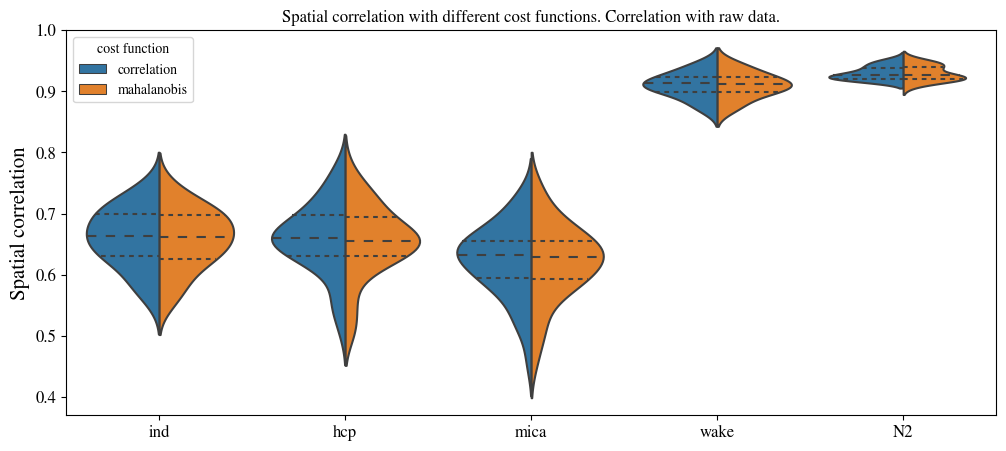

In [8]:
plt.figure(figsize=(12,5))
gfg = sns.violinplot(data=df_corrs, x="conn", y="correlation", hue="costfunc", split=True, inner="quart")
gfg.legend(fontsize=10,title='cost function')
plt.xlabel('')
plt.ylabel('Spatial correlation', fontsize=15)
plt.title('Spatial correlation with different cost functions. Correlation with raw data.')
plt.show()

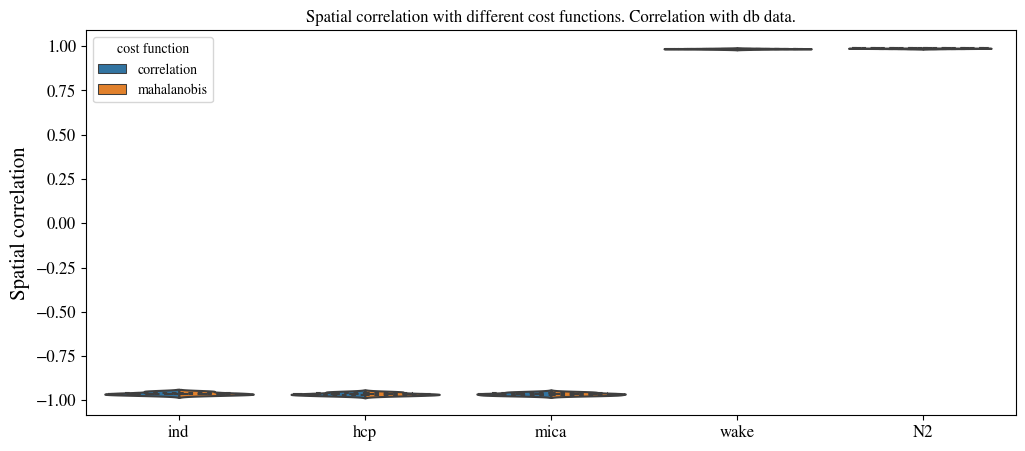

In [9]:
plt.figure(figsize=(12,5))
gfg = sns.violinplot(data=df_corrs, x="conn", y="correlation_db", hue="costfunc", split=True, inner="quart")
gfg.legend(fontsize=10,title='cost function')
plt.xlabel('')
plt.ylabel('Spatial correlation', fontsize=15)
plt.title('Spatial correlation with different cost functions. Correlation with db data.')
plt.show()

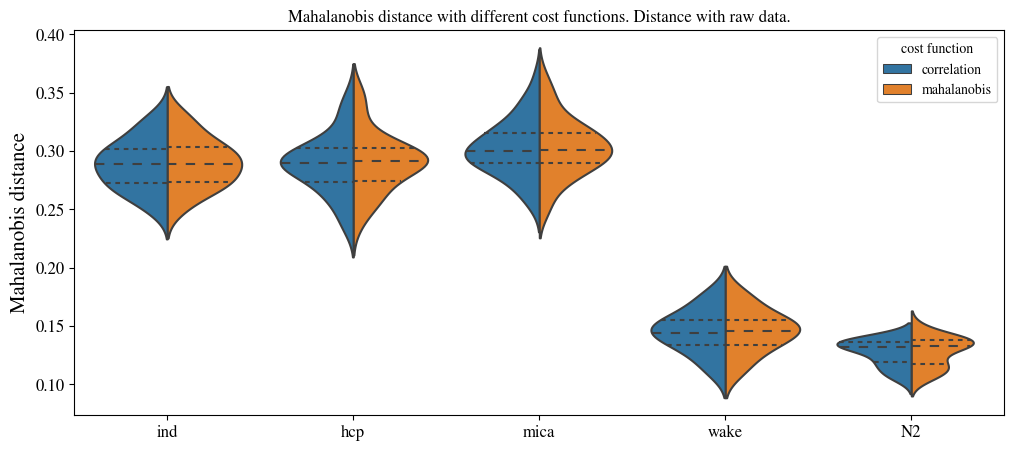

In [10]:
plt.figure(figsize=(12,5))
gfg = sns.violinplot(data=df_corrs, x="conn", y="mahalanobis", hue="costfunc", split=True, inner="quart")
gfg.legend(fontsize=10,title='cost function')
plt.xlabel('')
plt.ylabel('Mahalanobis distance', fontsize=15)
plt.title('Mahalanobis distance with different cost functions. Distance with raw data.')
plt.show()

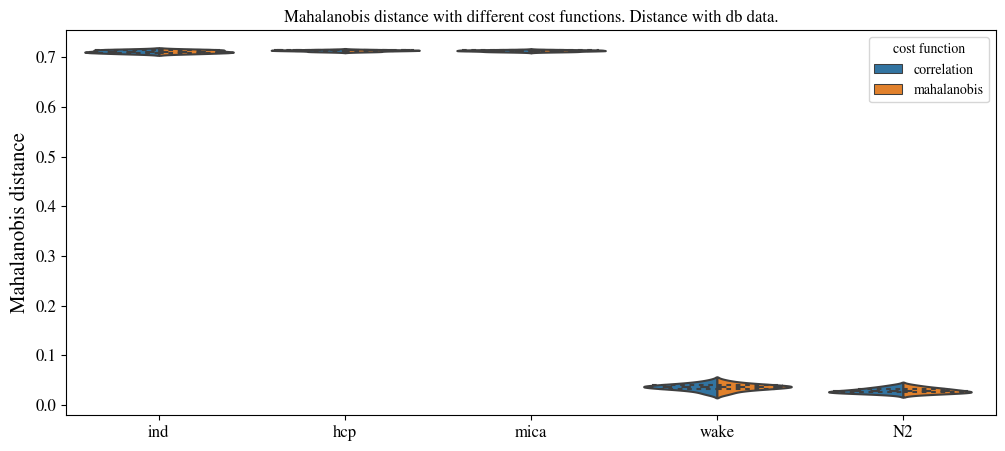

In [11]:
plt.figure(figsize=(12,5))
gfg = sns.violinplot(data=df_corrs, x="conn", y="mahalanobis_db", hue="costfunc", split=True, inner="quart")
gfg.legend(fontsize=10,title='cost function')
plt.xlabel('')
plt.ylabel('Mahalanobis distance', fontsize=15)
plt.title('Mahalanobis distance with different cost functions. Distance with db data.')
plt.show()

0.6601622449397062
0.659108831190568
0.2908007949060487
0.29078943067142


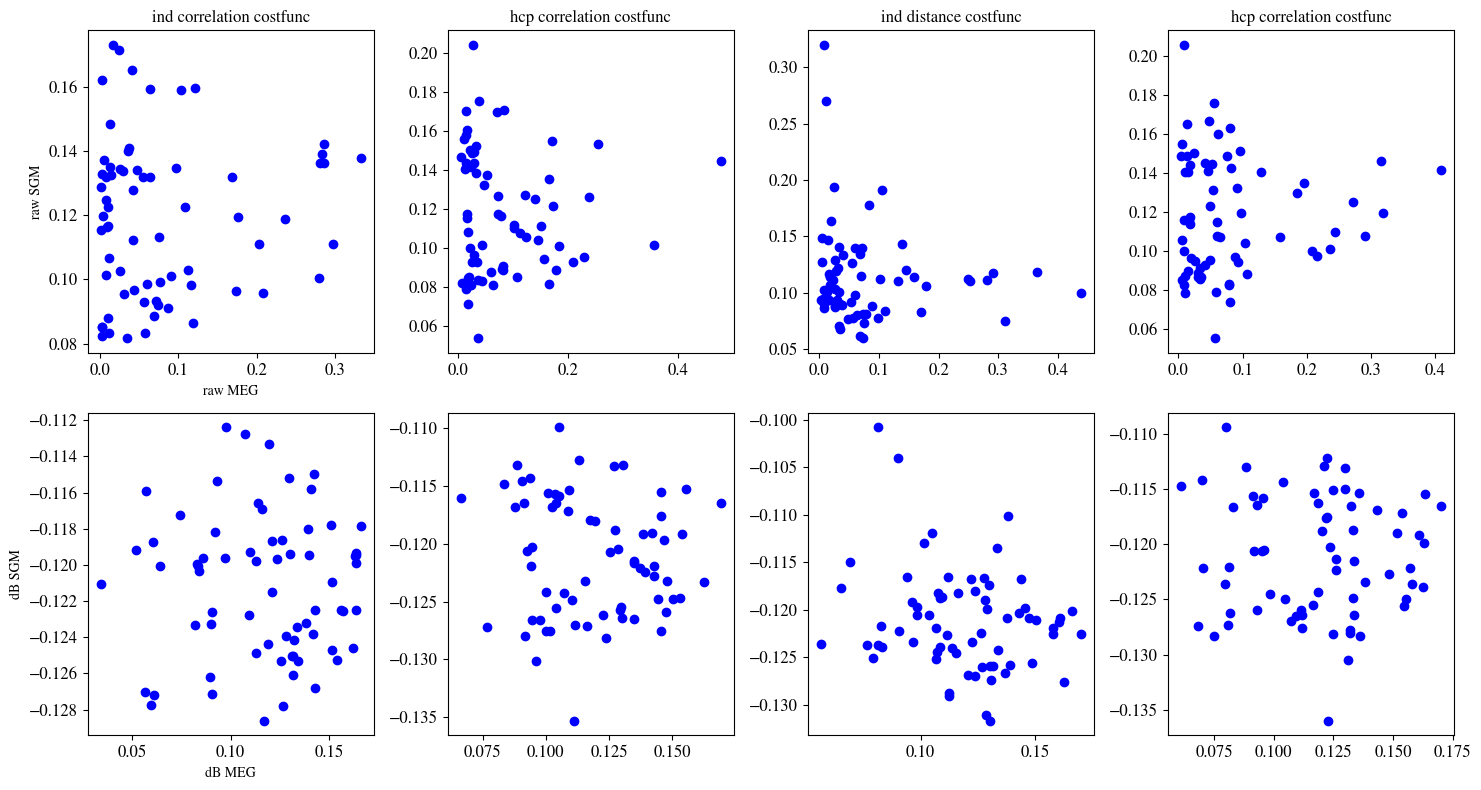

In [12]:
stimulus_roi = np.array([])
w_var = 1
w_means = 0

fig,ax = plt.subplots(2,4,figsize=(15,8))

# ind = np.argmax(df_microint_ind_oldcost["spatial"])
ind= min(range(len(df_orgsgm_ind_oldcost["spatial"])), key=lambda i: abs(df_orgsgm_ind_oldcost["spatial"][i] - np.mean(df_orgsgm_ind_oldcost["spatial"])))
print(df_orgsgm_ind_oldcost["spatial"][ind])

_, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,ind_psd,rois_with_MEG,fvec,ind,df_orgsgm_ind_oldcost, stimulus_roi, w_var, w_means, "ind", "chang")

# ax[0][0].scatter(rois_with_MEG, eigvec_ns_summed, color='b',label='SGM')
# ax[0][0].scatter(rois_with_MEG, summed_PSD, color='r',label='MEG')
ax[0][0].scatter(summed_PSD, eigvec_ns_summed, color='b')
# ax[0][0].legend()
ax[0][0].set_title('ind correlation costfunc')
ax[0][0].set_xlabel('raw MEG')
ax[0][0].set_ylabel('raw SGM')

# ax[1][0].scatter(rois_with_MEG, eigvec_ns_summed_db, color='b',label='SGM')
# ax[1][0].scatter(rois_with_MEG, summed_PSD_db, color='r',label='MEG')
ax[1][0].scatter(summed_PSD_db, eigvec_ns_summed_db, color='b')
ax[1][0].set_xlabel('dB MEG')
ax[1][0].set_ylabel('dB SGM')

# ind = np.argmax(df_microint_hcp_oldcost["spatial"])
ind= min(range(len(df_orgsgm_hcp_oldcost["spatial"])), key=lambda i: abs(df_orgsgm_hcp_oldcost["spatial"][i] - np.mean(df_orgsgm_hcp_oldcost["spatial"])))
print(df_orgsgm_hcp_oldcost["spatial"][ind])

_, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,ind_psd,rois_with_MEG,fvec,ind,df_orgsgm_hcp_oldcost, stimulus_roi, w_var, w_means, "hcp", "chang")

# ax[0][1].scatter(rois_with_MEG, eigvec_ns_summed, color='b',label='SGM')
# ax[0][1].scatter(rois_with_MEG, summed_PSD, color='r',label='MEG')
ax[0][1].scatter(summed_PSD, eigvec_ns_summed, color='b')
ax[0][1].set_title('hcp correlation costfunc')

# ax[1][1].scatter(rois_with_MEG, eigvec_ns_summed_db, color='b',label='SGM')
# ax[1][1].scatter(rois_with_MEG, summed_PSD_db, color='r',label='MEG')
ax[1][1].scatter(summed_PSD_db, eigvec_ns_summed_db, color='b')


# ind = np.argmin(df_microint_ind_mahalanobis["spatial"])
ind= min(range(len(df_orgsgm_ind_mahalanobis["spatial"])), key=lambda i: abs(df_orgsgm_ind_mahalanobis["spatial"][i] - np.mean(df_orgsgm_ind_mahalanobis["spatial"])))
print(df_orgsgm_ind_mahalanobis["spatial"][ind])

_, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,ind_psd,rois_with_MEG,fvec,i,df_orgsgm_ind_mahalanobis, stimulus_roi, w_var, w_means, "ind", "chang")

# ax[0][2].scatter(rois_with_MEG, eigvec_ns_summed, color='b',label='SGM')
# ax[0][2].scatter(rois_with_MEG, summed_PSD, color='r',label='MEG') 
ax[0][2].scatter(summed_PSD, eigvec_ns_summed, color='b')
ax[0][2].set_title('ind distance costfunc')

# ax[1][2].scatter(rois_with_MEG, eigvec_ns_summed_db, color='b',label='SGM')
# ax[1][2].scatter(rois_with_MEG, summed_PSD_db, color='r',label='MEG')
ax[1][2].scatter(summed_PSD_db, eigvec_ns_summed_db, color='b')

# ind = np.argmin(df_microint_hcp_mahalanobis["spatial"])
ind= min(range(len(df_orgsgm_hcp_mahalanobis["spatial"])), key=lambda i: abs(df_orgsgm_hcp_mahalanobis["spatial"][i] - np.mean(df_orgsgm_hcp_mahalanobis["spatial"])))
print(df_orgsgm_hcp_mahalanobis["spatial"][ind])

_, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,ind_psd,rois_with_MEG,fvec,ind,df_orgsgm_hcp_mahalanobis, stimulus_roi, w_var, w_means, "hcp", "chang")

# ax[0][3].scatter(rois_with_MEG, eigvec_ns_summed, color='b',label='SGM')
# ax[0][3].scatter(rois_with_MEG, summed_PSD, color='r',label='MEG')
ax[0][3].scatter(summed_PSD, eigvec_ns_summed, color='b')
ax[0][3].set_title('hcp correlation costfunc')
    
# ax[1][3].scatter(rois_with_MEG, eigvec_ns_summed_db, color='b',label='SGM')
# ax[1][3].scatter(rois_with_MEG, summed_PSD_db, color='r',label='MEG')
ax[1][3].scatter(summed_PSD_db, eigvec_ns_summed_db, color='b')

plt.tight_layout()

0.9128745491006817
0.9283521535820479
0.14656762957747685
0.1321463741621947


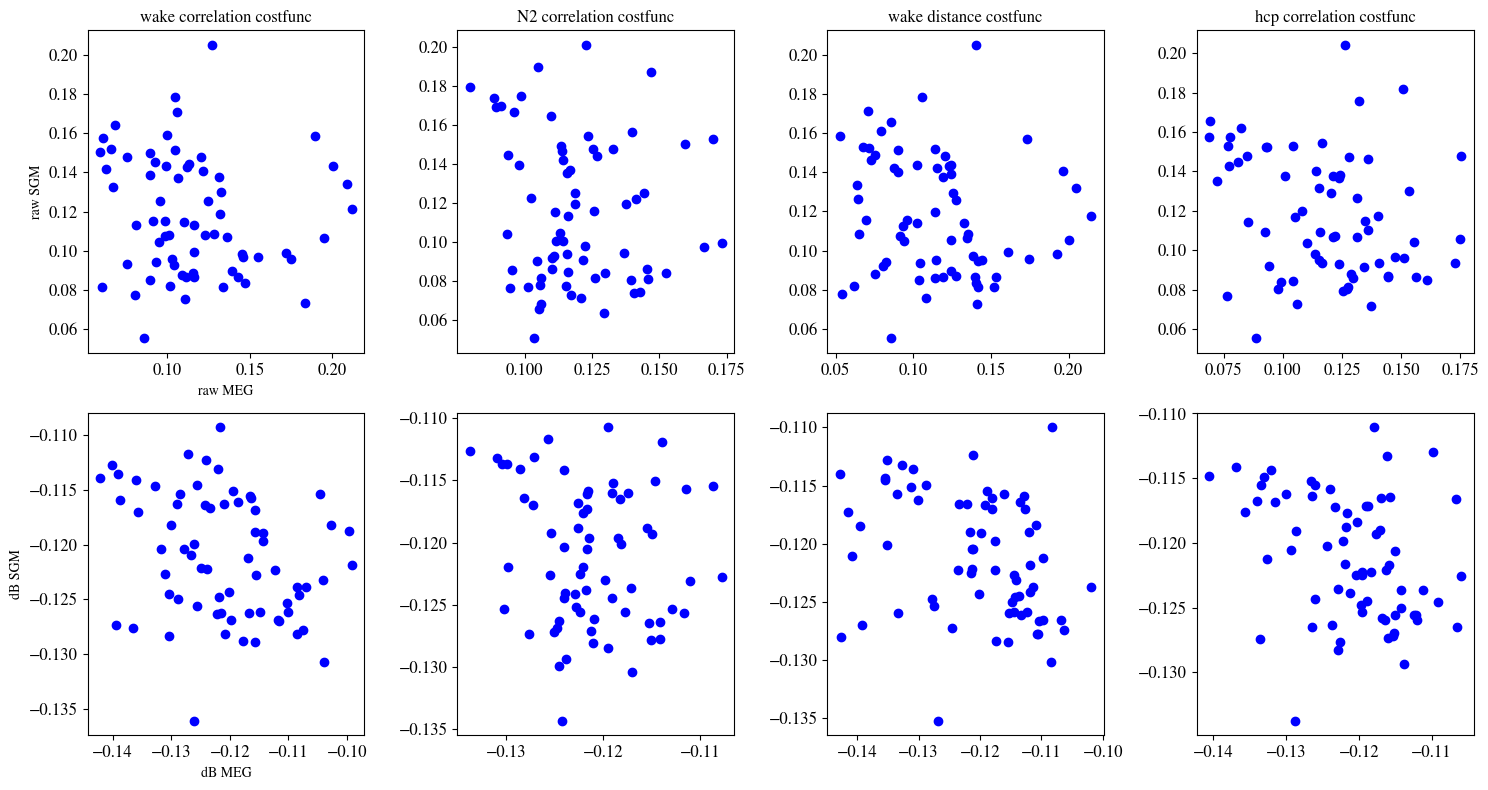

In [13]:
stimulus_roi = np.array([])
w_var = 1
w_means = 0

fig,ax = plt.subplots(2,4,figsize=(15,8))

# ind = np.argmax(df_microint_wake_oldcost["spatial"])
ind= min(range(len(df_orgsgm_wake_oldcost["spatial"])), key=lambda i: abs(df_orgsgm_wake_oldcost["spatial"][i] - np.mean(df_orgsgm_wake_oldcost["spatial"])))
print(df_orgsgm_wake_oldcost["spatial"][ind])

_, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,psd_wake,rois_with_MEG,fvec_sleep,ind,df_orgsgm_wake_oldcost, stimulus_roi, w_var, w_means, "hcp", "sleep")

# ax[0][0].scatter(rois_with_MEG, eigvec_ns_summed, color='b',label='SGM')
# ax[0][0].scatter(rois_with_MEG, summed_PSD, color='r',label='MEG')
ax[0][0].scatter(summed_PSD, eigvec_ns_summed, color='b')
# ax[0][0].legend()
ax[0][0].set_title('wake correlation costfunc')
ax[0][0].set_xlabel('raw MEG')
ax[0][0].set_ylabel('raw SGM')

# ax[1][0].scatter(rois_with_MEG, eigvec_ns_summed_db, color='b',label='SGM')
# ax[1][0].scatter(rois_with_MEG, summed_PSD_db, color='r',label='MEG')
ax[1][0].scatter(summed_PSD_db, eigvec_ns_summed_db, color='b')
ax[1][0].set_ylabel('dB')
ax[1][0].set_xlabel('dB MEG')
ax[1][0].set_ylabel('dB SGM')

# ind = np.argmax(df_microint_N2_oldcost["spatial"])
ind= min(range(len(df_orgsgm_N2_oldcost["spatial"])), key=lambda i: abs(df_orgsgm_N2_oldcost["spatial"][i] - np.mean(df_orgsgm_N2_oldcost["spatial"])))
print(df_orgsgm_N2_oldcost["spatial"][ind])

_, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,psd_N2,rois_with_MEG,fvec_sleep,ind,df_orgsgm_N2_oldcost, stimulus_roi, w_var, w_means, "hcp", "sleep")

# ax[0][1].scatter(rois_with_MEG, eigvec_ns_summed, color='b',label='SGM')
# ax[0][1].scatter(rois_with_MEG, summed_PSD, color='r',label='MEG')
ax[0][1].scatter(summed_PSD, eigvec_ns_summed, color='b')
ax[0][1].set_title('N2 correlation costfunc')

# ax[1][1].scatter(rois_with_MEG, eigvec_ns_summed_db, color='b',label='SGM')
# ax[1][1].scatter(rois_with_MEG, summed_PSD_db, color='r',label='MEG')
ax[1][1].scatter(summed_PSD_db, eigvec_ns_summed_db, color='b')


# ind = np.argmin(df_microint_wake_mahalanobis["spatial"])
ind= min(range(len(df_orgsgm_wake_mahalanobis["spatial"])), key=lambda i: abs(df_orgsgm_wake_mahalanobis["spatial"][i] - np.mean(df_orgsgm_wake_mahalanobis["spatial"])))
print(df_orgsgm_wake_mahalanobis["spatial"][ind])

_, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,psd_wake,rois_with_MEG,fvec_sleep,i,df_orgsgm_wake_mahalanobis, stimulus_roi, w_var, w_means, "hcp", "sleep")

# ax[0][2].scatter(rois_with_MEG, eigvec_ns_summed, color='b',label='SGM')
# ax[0][2].scatter(rois_with_MEG, summed_PSD, color='r',label='MEG') 
ax[0][2].scatter(summed_PSD, eigvec_ns_summed, color='b')
ax[0][2].set_title('wake distance costfunc')

# ax[1][2].scatter(rois_with_MEG, eigvec_ns_summed_db, color='b',label='SGM')
# ax[1][2].scatter(rois_with_MEG, summed_PSD_db, color='r',label='MEG')
ax[1][2].scatter(summed_PSD_db, eigvec_ns_summed_db, color='b')

# ind = np.argmin(df_microint_N2_mahalanobis["spatial"])
ind= min(range(len(df_orgsgm_N2_mahalanobis["spatial"])), key=lambda i: abs(df_orgsgm_N2_mahalanobis["spatial"][i] - np.mean(df_orgsgm_N2_mahalanobis["spatial"])))
print(df_orgsgm_N2_mahalanobis["spatial"][ind])

_, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,psd_N2,rois_with_MEG,fvec_sleep,ind,df_orgsgm_N2_mahalanobis, stimulus_roi, w_var, w_means, "hcp", "sleep")

# ax[0][3].scatter(rois_with_MEG, eigvec_ns_summed, color='b',label='SGM')
# ax[0][3].scatter(rois_with_MEG, summed_PSD, color='r',label='MEG')
ax[0][3].scatter(summed_PSD, eigvec_ns_summed, color='b')
ax[0][3].set_title('hcp correlation costfunc')
    
# ax[1][3].scatter(rois_with_MEG, eigvec_ns_summed_db, color='b',label='SGM')
# ax[1][3].scatter(rois_with_MEG, summed_PSD_db, color='r',label='MEG')
ax[1][3].scatter(summed_PSD_db, eigvec_ns_summed_db, color='b')

plt.tight_layout()

0.6601622449397062
0.659108831190568
0.2908007949060487
0.29078943067142


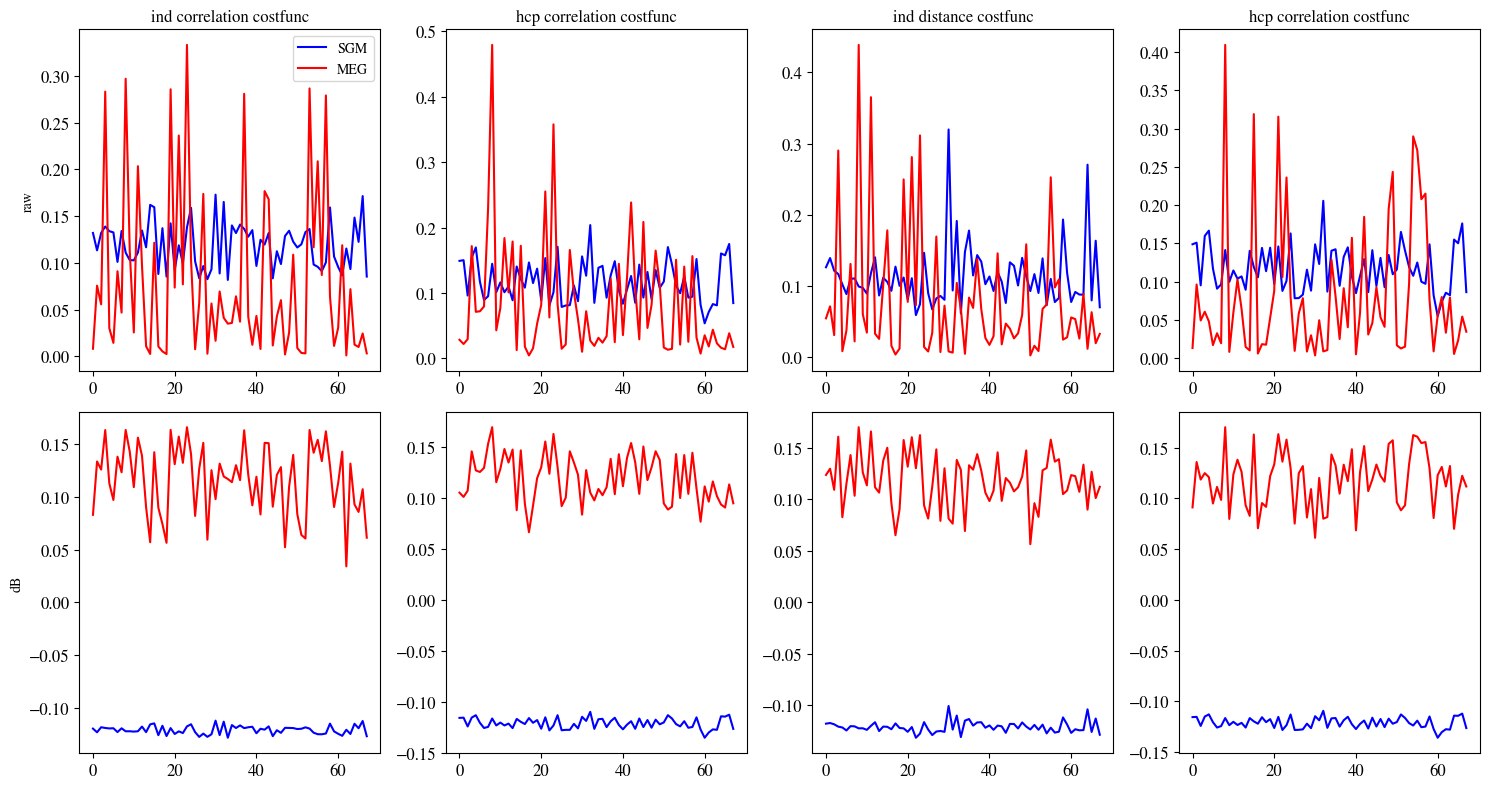

In [14]:
stimulus_roi = np.array([])
w_var = 1
w_means = 0

fig,ax = plt.subplots(2,4,figsize=(15,8))

# ind = np.argmax(df_microint_ind_oldcost["spatial"])
ind= min(range(len(df_orgsgm_ind_oldcost["spatial"])), key=lambda i: abs(df_orgsgm_ind_oldcost["spatial"][i] - np.mean(df_orgsgm_ind_oldcost["spatial"])))
print(df_orgsgm_ind_oldcost["spatial"][ind])

_, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,ind_psd,rois_with_MEG,fvec,ind,df_orgsgm_ind_oldcost, stimulus_roi, w_var, w_means, "ind", "chang")

ax[0][0].plot(rois_with_MEG, eigvec_ns_summed, color='b',label='SGM')
ax[0][0].plot(rois_with_MEG, summed_PSD, color='r',label='MEG')
ax[0][0].legend()
ax[0][0].set_title('ind correlation costfunc')
ax[0][0].set_ylabel('raw')

ax[1][0].plot(rois_with_MEG, eigvec_ns_summed_db, color='b',label='SGM')
ax[1][0].plot(rois_with_MEG, summed_PSD_db, color='r',label='MEG')
ax[1][0].set_ylabel('dB')

# ind = np.argmax(df_microint_hcp_oldcost["spatial"])
ind= min(range(len(df_orgsgm_hcp_oldcost["spatial"])), key=lambda i: abs(df_orgsgm_hcp_oldcost["spatial"][i] - np.mean(df_orgsgm_hcp_oldcost["spatial"])))
print(df_orgsgm_hcp_oldcost["spatial"][ind])

_, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,ind_psd,rois_with_MEG,fvec,ind,df_orgsgm_hcp_oldcost, stimulus_roi, w_var, w_means, "hcp", "chang")

ax[0][1].plot(rois_with_MEG, eigvec_ns_summed, color='b',label='SGM')
ax[0][1].plot(rois_with_MEG, summed_PSD, color='r',label='MEG')
ax[0][1].set_title('hcp correlation costfunc')

ax[1][1].plot(rois_with_MEG, eigvec_ns_summed_db, color='b',label='SGM')
ax[1][1].plot(rois_with_MEG, summed_PSD_db, color='r',label='MEG')


# ind = np.argmin(df_microint_ind_mahalanobis["spatial"])
ind= min(range(len(df_orgsgm_ind_mahalanobis["spatial"])), key=lambda i: abs(df_orgsgm_ind_mahalanobis["spatial"][i] - np.mean(df_orgsgm_ind_mahalanobis["spatial"])))
print(df_orgsgm_ind_mahalanobis["spatial"][ind])

_, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,ind_psd,rois_with_MEG,fvec,i,df_orgsgm_ind_mahalanobis, stimulus_roi, w_var, w_means, "ind", "chang")

ax[0][2].plot(rois_with_MEG, eigvec_ns_summed, color='b',label='SGM')
ax[0][2].plot(rois_with_MEG, summed_PSD, color='r',label='MEG') 
ax[0][2].set_title('ind distance costfunc')

ax[1][2].plot(rois_with_MEG, eigvec_ns_summed_db, color='b',label='SGM')
ax[1][2].plot(rois_with_MEG, summed_PSD_db, color='r',label='MEG')

# ind = np.argmin(df_microint_hcp_mahalanobis["spatial"])
ind= min(range(len(df_orgsgm_hcp_mahalanobis["spatial"])), key=lambda i: abs(df_orgsgm_hcp_mahalanobis["spatial"][i] - np.mean(df_orgsgm_hcp_mahalanobis["spatial"])))
print(df_orgsgm_hcp_mahalanobis["spatial"][ind])

_, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,ind_psd,rois_with_MEG,fvec,ind,df_orgsgm_hcp_mahalanobis, stimulus_roi, w_var, w_means, "hcp", "chang")

ax[0][3].plot(rois_with_MEG, eigvec_ns_summed, color='b',label='SGM')
ax[0][3].plot(rois_with_MEG, summed_PSD, color='r',label='MEG')
ax[0][3].set_title('hcp correlation costfunc')
    
ax[1][3].plot(rois_with_MEG, eigvec_ns_summed_db, color='b',label='SGM')
ax[1][3].plot(rois_with_MEG, summed_PSD_db, color='r',label='MEG')

plt.tight_layout()

0.9128745491006817
0.9283521535820479
0.14656762957747685
0.1321463741621947


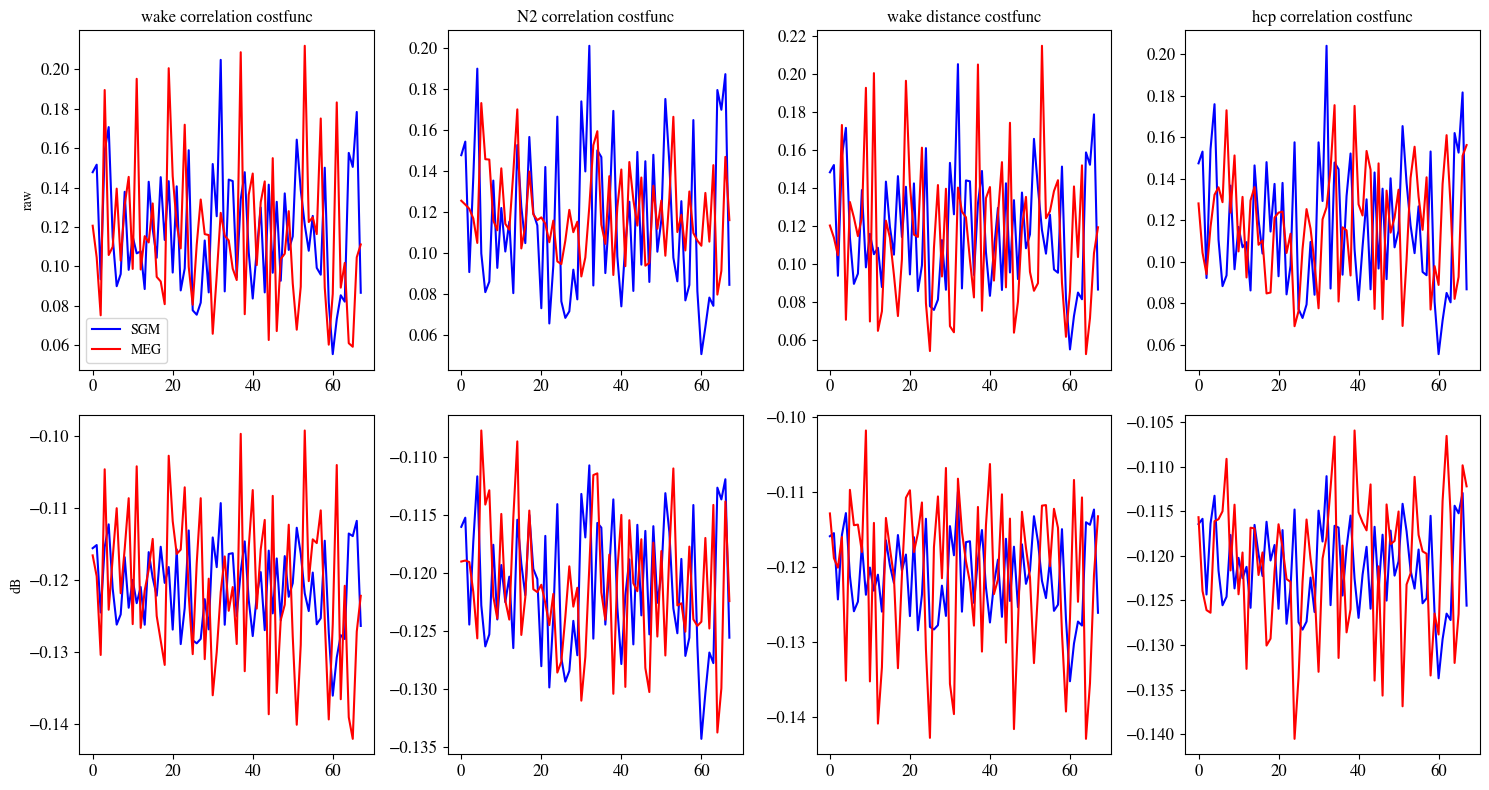

In [15]:
stimulus_roi = np.array([])
w_var = 1
w_means = 0

fig,ax = plt.subplots(2,4,figsize=(15,8))

# ind = np.argmax(df_microint_wake_oldcost["spatial"])
ind= min(range(len(df_orgsgm_wake_oldcost["spatial"])), key=lambda i: abs(df_orgsgm_wake_oldcost["spatial"][i] - np.mean(df_orgsgm_wake_oldcost["spatial"])))
print(df_orgsgm_wake_oldcost["spatial"][ind])

_, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,psd_wake,rois_with_MEG,fvec_sleep,ind,df_orgsgm_wake_oldcost, stimulus_roi, w_var, w_means, "hcp", "sleep")

ax[0][0].plot(rois_with_MEG, eigvec_ns_summed, color='b',label='SGM')
ax[0][0].plot(rois_with_MEG, summed_PSD, color='r',label='MEG')
ax[0][0].legend()
ax[0][0].set_title('wake correlation costfunc')
ax[0][0].set_ylabel('raw')

ax[1][0].plot(rois_with_MEG, eigvec_ns_summed_db, color='b',label='SGM')
ax[1][0].plot(rois_with_MEG, summed_PSD_db, color='r',label='MEG')
ax[1][0].set_ylabel('dB')

# ind = np.argmax(df_microint_N2_oldcost["spatial"])
ind= min(range(len(df_orgsgm_N2_oldcost["spatial"])), key=lambda i: abs(df_orgsgm_N2_oldcost["spatial"][i] - np.mean(df_orgsgm_N2_oldcost["spatial"])))
print(df_orgsgm_N2_oldcost["spatial"][ind])

_, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,psd_N2,rois_with_MEG,fvec_sleep,ind,df_orgsgm_N2_oldcost, stimulus_roi, w_var, w_means, "hcp", "sleep")

ax[0][1].plot(rois_with_MEG, eigvec_ns_summed, color='b',label='SGM')
ax[0][1].plot(rois_with_MEG, summed_PSD, color='r',label='MEG')
ax[0][1].set_title('N2 correlation costfunc')

ax[1][1].plot(rois_with_MEG, eigvec_ns_summed_db, color='b',label='SGM')
ax[1][1].plot(rois_with_MEG, summed_PSD_db, color='r',label='MEG')


# ind = np.argmin(df_microint_wake_mahalanobis["spatial"])
ind= min(range(len(df_orgsgm_wake_mahalanobis["spatial"])), key=lambda i: abs(df_orgsgm_wake_mahalanobis["spatial"][i] - np.mean(df_orgsgm_wake_mahalanobis["spatial"])))
print(df_orgsgm_wake_mahalanobis["spatial"][ind])

_, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,psd_wake,rois_with_MEG,fvec_sleep,i,df_orgsgm_wake_mahalanobis, stimulus_roi, w_var, w_means, "hcp", "sleep")

ax[0][2].plot(rois_with_MEG, eigvec_ns_summed, color='b',label='SGM')
ax[0][2].plot(rois_with_MEG, summed_PSD, color='r',label='MEG') 
ax[0][2].set_title('wake distance costfunc')

ax[1][2].plot(rois_with_MEG, eigvec_ns_summed_db, color='b',label='SGM')
ax[1][2].plot(rois_with_MEG, summed_PSD_db, color='r',label='MEG')

# ind = np.argmin(df_microint_N2_mahalanobis["spatial"])
ind= min(range(len(df_orgsgm_N2_mahalanobis["spatial"])), key=lambda i: abs(df_orgsgm_N2_mahalanobis["spatial"][i] - np.mean(df_orgsgm_N2_mahalanobis["spatial"])))
print(df_orgsgm_N2_mahalanobis["spatial"][ind])

_, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,psd_N2,rois_with_MEG,fvec_sleep,ind,df_orgsgm_N2_mahalanobis, stimulus_roi, w_var, w_means, "hcp", "sleep")

ax[0][3].plot(rois_with_MEG, eigvec_ns_summed, color='b',label='SGM')
ax[0][3].plot(rois_with_MEG, summed_PSD, color='r',label='MEG')
ax[0][3].set_title('hcp correlation costfunc')
    
ax[1][3].plot(rois_with_MEG, eigvec_ns_summed_db, color='b',label='SGM')
ax[1][3].plot(rois_with_MEG, summed_PSD_db, color='r',label='MEG')

plt.tight_layout()